In [1]:
import pandas as pd

dev = True  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries as ATS

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.25. Call by using:
model = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

model.fit(traindata, ts_column,target)
model.predict(testdata, forecast_period)



# Load Dataset

In [2]:
datapath = '../Documents/Auto_TS/example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, index_col=None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [3]:
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


<AxesSubplot:>

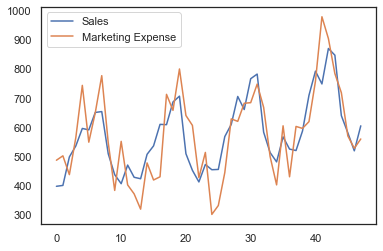

In [4]:
dataset[['Sales', 'Marketing Expense']].plot()

# Train Model

In [5]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [6]:
FORECAST_PERIOD = 3

In [7]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [8]:
automl_model = ATS(
    score_type='rmse',
    forecast_period=FORECAST_PERIOD,
    model_type='best', verbose=0
)        

In [9]:
automl_model.fit(
    traindata=train,
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

Start of Fit.....
    Target variable given as = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Time Period sep: , target: Sales
    Dataframe loaded successfully. Shape of data set = (45, 2)
Time Interval between obserations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 31
It is a Monthly time series.


Building Prophet Model



Running Facebook Prophet Model...


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


  Starting Prophet Fit
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using sliding window cross validation = 10
    RMSE = 133.11
    Std Deviation of Originals = 30.79
    Normalized RMSE = 432%
Cross Validation window: 1 completed
    RMSE = 70.62
    Std Deviation of Originals = 65.53
    Normalized RMSE = 108%
Cross Validation window: 2 completed
    RMSE = 27.49
    Std Deviation of Originals = 53.20
    Normalized RMSE = 52%
Cross Validation window: 3 completed
    RMSE = 14.54
    Std Deviation of Originals = 43.00
    Normalized RMSE = 34%
Cross Validation window: 4 completed
    RMSE = 33.12
    Std Deviation of Originals = 127.25
    Normalized RMSE = 26%
Cross Validation window: 5 completed
Error: Not able to plot Prophet CV results
  End of Prophet Cross Validation
---------------------------
Final Prophet CV results:
---------------------------
    RMSE = 25.26
    Std Deviation of Originals = 132.62
    Normalized RMSE = 19%
Time taken (in secon

# Evaluate Results

In [10]:
automl_model.get_leaderboard()

,name,rmse
0,Prophet,55.775721
3,ML,74.847572
1,auto_SARIMAX,100.588653
2,VAR,150.558831


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

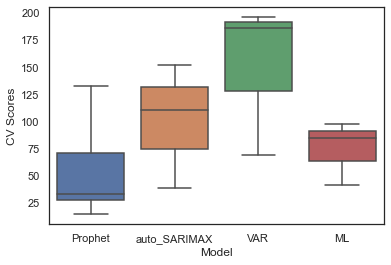

In [11]:
automl_model.plot_cv_scores()

In [12]:
# There is a Bug with Prophet folds: https://github.com/AutoViML/Auto_TS/issues/25
automl_model.get_cv_scores()

,Model,CV Scores
0,Prophet,133.108922
1,Prophet,70.620231
2,Prophet,27.494874
3,Prophet,14.538348
4,Prophet,33.116229
5,auto_SARIMAX,39.160695
6,auto_SARIMAX,110.545846
7,auto_SARIMAX,152.059417
8,VAR,69.076995
9,VAR,186.176596


In [13]:
results_dict = automl_model.get_ml_dict()

In [14]:
results_dict['Prophet']['forecast'] 

22    573.195754
23    577.045968
24    581.024522
24    538.121082
25    539.534174
26    540.810514
28    664.892703
29    666.957536
30    743.706177
34    501.065011
35    564.996931
36    540.082234
42    822.788201
43    834.284062
44    667.884572
Name: yhat, dtype: float64

In [15]:
results_dict['auto_SARIMAX']['forecast']

[array([531.68260833, 587.32045908, 582.10319645]),
 array([597.7458085 , 641.46748252, 715.86323808]),
 array([697.26556448, 650.63189672, 624.88787892])]

In [16]:
results_dict['VAR']['forecast'] 

[Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-01-01  595.608535  61.487925     475.094416     716.122654
 2014-02-01  614.776696  80.828997     456.354772     773.198619
 2014-03-01  605.620060  91.770137     425.753896     785.486224,
 Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-04-01  578.137568  63.264530     454.141368     702.133769
 2014-05-01  568.892687  81.654842     408.852137     728.933236
 2014-06-01  558.281921  90.703695     380.505946     736.057896,
 Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-07-01  675.238551  64.451593     548.915750     801.561352
 2014-08-01  592.944589  88.485526     419.516145     766.373034
 2014-09-01  528.779229  99.839597     333.097214     724.461244]

In [17]:
results_dict['ML']['forecast'] # This has CV implemented, but currently does not return the forecast values from the CV (maybe a future enhancement)

[]

# Forecast Results

In [18]:
# Actual Test
test

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [19]:
# Using Best Model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
)  
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,634.647854,495.331302,765.198331,634.647854,634.647854,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,0.0,0.0,0.0,630.731937
1,2014-11-01,637.276945,481.272209,740.517779,637.276944,637.276946,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,0.0,0.0,0.0,609.508011
2,2014-12-01,639.821227,493.683067,761.357331,639.821225,639.821228,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,0.0,0.0,0.0,630.011883


In [20]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,634.647854,491.690520,756.919858,634.647854,634.647854,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,-3.915917,0.0,0.0,0.0,630.731937
1,2014-11-01,637.276945,480.789411,737.840423,637.276944,637.276946,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,-27.768934,0.0,0.0,0.0,609.508011
2,2014-12-01,639.821227,502.012712,756.055152,639.821225,639.821228,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,-9.809344,0.0,0.0,0.0,630.011883


In [21]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    model='auto_SARIMAX'
)
future_predictions

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,610.260981,68.253992,476.485615,744.036347
2014-11-01,607.421352,74.593102,461.221558,753.621145
2014-12-01,627.381176,75.763733,478.886987,775.875365


In [22]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    model='ML'
)
future_predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper
Time Period,,,,
2014-10-01,523.6,NaN,NaN,NaN
2014-11-01,513.0,NaN,NaN,NaN
2014-12-01,522.9,NaN,NaN,NaN


In [23]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    model='VAR'
)
future_predictions

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,545.797051,69.211944,410.144133,681.449969
2014-11-01,494.259433,93.623510,310.760726,677.758140
2014-12-01,466.367747,107.362981,255.940170,676.795323
